In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("parabolic_trend/Data.csv")
df = df.rename(columns={"Laba & Rugi (dalam Milyar)" : "L&R"})

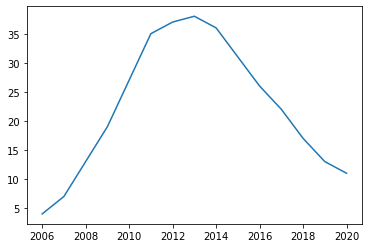

In [3]:
plt.plot(df['TAHUN'],df['L&R'])

In [4]:
def parabolicTrend(data,name) :
    l = int(len(data['L&R']))
    if(l % 2 != 0) :
        rlst = [0]
        llst =[]
        for i in range(1,int(l/2)+1):
            rlst.append(i)
            llst.append(-1 * i)
        llst.reverse()
        llst = llst + rlst       
    else :
        rlst = [1]
        llst = [-1]
        st = 3
        for i in range(1,int(l/2)) : 
            rlst.append(st)
            llst.append(-1*st)
            st+=2
        llst.reverse()
        llst = llst + rlst

    i = 0 
    xy = []
    xsqr = []
    xsqry = []
    xbq = []
    for x in llst :
        xy.append(x*data['L&R'][i].item())
        xsqr.append(x**2)
        xsqry.append(x**2 * data['L&R'][i].item())
        xbq.append(x**4)
        i+=1
    data['x'],data['xy'],data['X^2'],data['x^2y'],data['x^4']= llst,xy,xsqr,xsqry,xbq
    b=data['xy'].sum()/data['X^2'].sum()
    c = (data['X^2'].sum() * data['L&R'].sum() - l * data['x^2y'].sum()) / (data['X^2'].sum()**2 + l * data['x^4'].sum())

    a = (data['L&R'].sum() / l - (c * data['X^2'].sum()/l))
    print("Untuk {}  : \nY\' ={} + {} X  + {} X^2".format(name,a,b,c))
    return data,a,b,c


#fungsi untuk forecasting

def forecasting(data,forecast,a,b,c) :
    l = int(len(data))
    i=1
    if(l%2==0) : 
        if(forecast < data['TAHUN'][0]) : 
            i = -1
        idx = data[data['x'] == i ].index.values
        xVal =  1 + (forecast - data['TAHUN'][idx].item()-1) * 2 if i>0 else -1 + (data['TAHUN'][idx].item()-forecast-1) * (-2)
        Y = a + b*xVal * (xVal**2)
        return Y
    else :
        i = 0
        idx = data[data['x'] == i ].index.values
        xVal =  forecast - data['TAHUN'][idx].item()
        Y = a + b*xVal  + c * (xVal**2)
        return Y


In [6]:
df,a1,b1,c1 = parabolicTrend(df,"data")
print("\n")
df

Untuk data  : 
Y' =19.074775928297054 + 0.375 X  + 0.17813700384122919 X^2




,TAHUN,L&R,x,xy,X^2,x^2y,x^4
0,2006,4,-7,-28,49,196,2401
1,2007,7,-6,-42,36,252,1296
2,2008,13,-5,-65,25,325,625
3,2009,19,-4,-76,16,304,256
4,2010,27,-3,-81,9,243,81
5,2011,35,-2,-70,4,140,16
6,2012,37,-1,-37,1,37,1
7,2013,38,0,0,0,0,0
8,2014,36,1,36,1,36,1
9,2015,31,2,62,4,124,16


In [7]:
Y = forecasting(df,2021,a1,b1,c1)
print("Perkiraan permintaan pada tahun 2009  = {} ".format(Y))

Perkiraan permintaan pada tahun 2009  = 33.47554417413572 
